In [22]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the base directory
base_dir = 'exp/2024.08.30'

# List to store dataframes
df_list = []

In [23]:
for folder_name in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder_name)
    
    # Check if it's a directory
    if os.path.isdir(folder_path):
        # Construct the path to the online_loss.csv
        csv_path = os.path.join(folder_path, 'online_loss.csv')
        
        if os.path.exists(csv_path):
            # Read the csv file
            df = pd.read_csv(csv_path)
           
            
            # Append to the list of dataframes
            df_list.append(df)
#df["Loss"] = df["Loss"] * -1
# Concatenate all dataframes along the rows (axis=0)
all_data = pd.concat(df_list, axis=0)

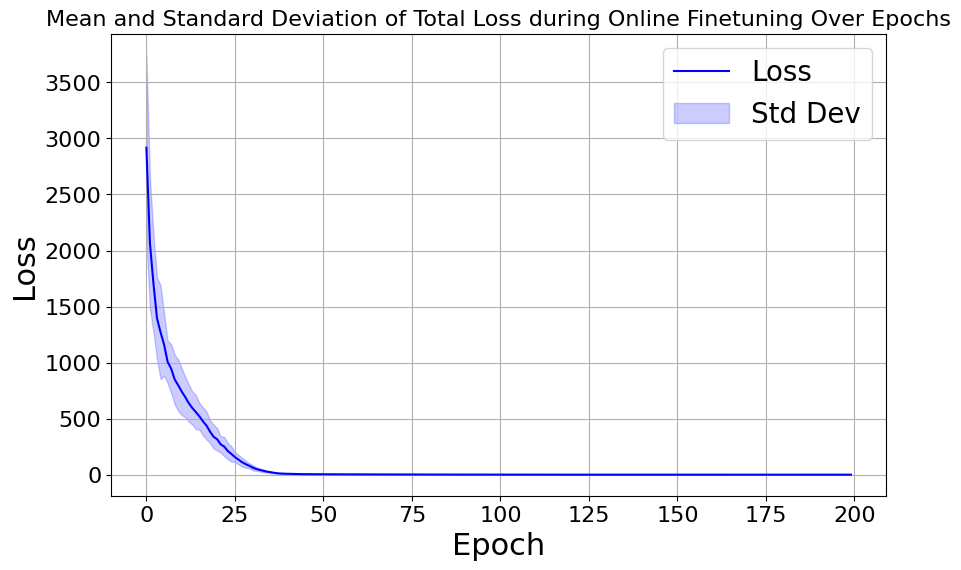

In [24]:
grouped_data = all_data.groupby('Epoch').agg(
    mean_loss=('Loss', 'mean'),
    std_loss=('Loss', 'std')
).reset_index()

# Plot the mean and standard deviation
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['Epoch'], grouped_data['mean_loss'], label='Loss', color='blue')
plt.fill_between(grouped_data['Epoch'], 
                 grouped_data['mean_loss'] - grouped_data['std_loss'], 
                 grouped_data['mean_loss'] + grouped_data['std_loss'], 
                 color='blue', alpha=0.2, label='Std Dev')
plt.xlabel('Epoch',fontsize=22)
plt.ylabel('Loss',fontsize=22)
plt.title('Mean and Standard Deviation of Total Loss during Online Finetuning Over Epochs',fontsize=16)
plt.legend(fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(True)
plt.savefig("plot/losses/total_loss_big.png")
plt.show()
plt.close()
#plt.show()